# Project UAS - Prediksi Harga Saham
---

    Nama : Abdullah Mu'adz Muflih
           Bagas Anwar Arif Nur
           Vivi Fitriyani
           
    NIM : 1306620078
    
    Dosen Pembimbing : Dr. Bambang Heru Iswanto
    
    Mata Kuliah : Pengantar Pembelajaran Mesin

#### Installing Library

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=f5cee33057887efcdc968ec4eb60ea1c0e3201c0bd19da9bf1c1c2fc71aae5ac
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
!pip install tensorflow-gpu

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-mblq_fyn/tensorflow-gpu_c292b70c7eda4cbb8e2193ba5881f8d7/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running

In [ ]:
import tensorflow as tf

# Check GPU availability
if tf.test.is_gpu_available():
    print('GPU is available')
else:
    print('GPU is NOT available')

GPU is available


In [ ]:
!pip install --upgrade tensorflow tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 43.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-29ykc23d/tensorflow-gpu_079afceab6f646e18f69a90131986421/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originat

In [ ]:
!pip install numpy

In [ ]:
!pip install keras

# Data Preprocessing

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
output_dir = '/kaggle/working/outputs'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
start_time = '2018-12-11'
end_time = '2023-03-31'

## Collecting Data

### Saham Chevron (CVX)

In [ ]:
df_cvx = yf.download('CVX',
                    start=start_time,
                    end=end_time)

In [ ]:
df_cvx

In [ ]:
df_cvx.to_csv(f'CVX-Stock-Price_{start_time}-{end_time}', index=False)

### Saham Shell

In [ ]:
df_shel = yf.download('SHEL',
                    start=start_time,
                    end=end_time)

In [ ]:
df_shel

In [ ]:
df_shel.to_csv(f'SHELL-Stock-Price_{start_time}-{end_time}', index=False)

### Harga Emas

In [ ]:
df_gc = yf.download('GC=F',
                    start=start_time,
                    end=end_time)

In [ ]:
df_gc

In [ ]:
df_gc.to_csv(f'Gold-Price_{start_time}-{end_time}', index=False)

### Harga Minyak Bumi (Crude Oil)

In [ ]:
df_cl = yf.download('CL=F',
                    start=start_time,
                    end=end_time)

In [ ]:
df_cl

In [ ]:
df_cl.to_csv(f'Crude-Oil-Price_{start_time}-{end_time}', index=False)

## Data Reshape

In [ ]:
df_cvx.reset_index(inplace=True)
df_shel.reset_index(inplace=True)
df_gc.reset_index(inplace=True)
df_cl.reset_index(inplace=True)

In [ ]:
df_cvx['Date'] = df_cvx['Date'].dt.strftime('%Y-%m-%d')
df_shel['Date'] = df_shel['Date'].dt.strftime('%Y-%m-%d')
df_gc['Date'] = df_gc['Date'].dt.strftime('%Y-%m-%d')
df_cl['Date'] = df_cl['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
date_cvx = df_cvx['Date'].unique()
date_gc = df_gc['Date'].unique()
date_cl = df_cl['Date'].unique()

In [ ]:
# Check date GC
del_gc = []
for i in date_gc:
    if i not in date_cvx:
        del_gc.append(i)

#Check date in CL
del_cl = []
for i in date_cl:
    if i not in date_cvx:
        del_cl.append(i)

In [ ]:
#del row not present:
for i in del_gc:
    df_gc.drop(df_gc.loc[(df_gc['Date'] == i)].index, inplace=True)

for i in del_cl:
    df_cl.drop(df_cl.loc[(df_cl['Date'] == i)].index, inplace=True)

In [ ]:
# Turn Back Into Index Date Time
df_cvx['Date'] = pd.to_datetime(df_cvx['Date'])
df_shel['Date'] = pd.to_datetime(df_shel['Date'])
df_gc['Date'] = pd.to_datetime(df_gc['Date'])
df_cl['Date'] = pd.to_datetime(df_cl['Date'])

df_cvx = df_cvx.set_index('Date')
df_shel = df_shel.set_index('Date')
df_gc = df_gc.set_index('Date')
df_cl = df_cl.set_index('Date')

In [ ]:
print(df_cvx.shape)
print(df_shel.shape)
print(df_gc.shape)
print(df_cl.shape)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_cvx.index,df_cvx['Close'],label = 'Close-Chevron')
plt.plot(df_shel.index,df_shel['Close'],label = 'Close-Shell')
#plt.plot(df_gc.index,df_gc['Close'],label = 'Close-Gold')
#plt.plot(df_cl.index,df_cl['Close'],label = 'Close-Oil')
plt.legend(loc='best')
plt.xlabel('Tanggal')
plt.ylabel('Close')
#plt.title('Grafik Saham Chevron dan Shell, Serta Harga Minyak bumi dan emas \n Periode Januari 2019 - Maret 2023')

plt.savefig(os.path.join(output_dir, 'Unormalize.png'))

## Data Normalization

In [ ]:
column = df_cvx.columns.values.tolist()
sclr = StandardScaler()

new_cvx = pd.DataFrame(sclr.fit_transform(df_cvx))
new_shel = pd.DataFrame(sclr.fit_transform(df_shel))
new_gc = pd.DataFrame(sclr.fit_transform(df_gc))
new_cl = pd.DataFrame(sclr.fit_transform(df_cl))

#Pembenaran Column
new_cvx.columns = column
new_shel.columns = column
new_gc.columns = column
new_cl.columns = column

#Pembenaran Index
new_cvx.index = df_cvx.index
new_shel.index = df_shel.index
new_gc.index = df_gc.index
new_cl.index = df_cl.index

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(new_cvx.index,new_cvx['Close'],label = 'Close-Chevron')
plt.plot(new_shel.index,new_shel['Close'],label = 'Close-Shell')
#plt.plot(new_gc.index,new_gc['Close'],label = 'Close-Gold')
#plt.plot(new_cl.index,new_cl['Close'],label = 'Close-Oil')
plt.legend(loc='best')
plt.xlabel('Tanggal')
plt.ylabel('Close')
#plt.title('Grafik Saham Chevron dan Shell, Serta Harga Minyak bumi dan emas \n Periode Januari 2019 - Maret 2023')
plt.savefig(os.path.join(output_dir, 'Normalize.png'))

### Merging Crude Oil dan Gold Close ke masing-masing data set saham perusahaan minyak

In [ ]:
# Sebelum Normalisasi
df_cvx['Close Oil'] = df_cl['Close']
df_cvx['Close GC'] = df_gc['Close']

df_shel['Close Oil'] = df_cl['Close']
df_shel['Close GC'] = df_gc['Close']

# Setelah Normalisasi
new_cvx['Close Oil'] = new_cl['Close']
new_cvx['Close GC'] = new_gc['Close']

new_shel['Close Oil'] = new_cl['Close']
new_shel['Close GC'] = new_gc['Close']

In [ ]:
new_shel

In [ ]:
new_cvx

## Feature Extraction

### Moving Average

In [ ]:
df_cvx['MA7'] = df_cvx['Close'].rolling(window=7).mean()
df_cvx['MA14'] = df_cvx['Close'].rolling(window=14).mean()
df_cvx['MA21'] = df_cvx['Close'].rolling(window=21).mean()

df_shel['MA7'] = df_shel['Close'].rolling(window=7).mean()
df_shel['MA14'] = df_shel['Close'].rolling(window=14).mean()
df_shel['MA21'] = df_shel['Close'].rolling(window=21).mean()

#Setelah Normalisasi
new_cvx['MA7'] = new_cvx['Close'].rolling(window=7).mean()
new_cvx['MA14'] = new_cvx['Close'].rolling(window=14).mean()
new_cvx['MA21'] = new_cvx['Close'].rolling(window=21).mean()

new_shel['MA7'] = new_shel['Close'].rolling(window=7).mean()
new_shel['MA14'] = new_shel['Close'].rolling(window=14).mean()
new_shel['MA21'] = new_shel['Close'].rolling(window=21).mean()

### Rate of Change, Stochastic Oscillator, and RSI

In [ ]:
df_cvx['Change'] = df_cvx['Close'].diff()
df_shel['Change'] = df_shel['Close'].diff()

df_cvx.ta.stoch(high = 'High', low = 'Low', k = 14, d = 3, append = True)
df_shel.ta.stoch(high = 'High', low = 'Low', k = 14, d = 3, append = True)

In [ ]:
change_cvx = df_cvx['Change']

change_up_cvx = change_cvx.copy()
change_down_cvx = change_cvx.copy()

change_up_cvx[change_up_cvx<0] = 0
change_down_cvx[change_down_cvx>0] = 0

avg_up_cvx = change_up_cvx.rolling(14).mean()
avg_down_cvx = change_down_cvx.rolling(14).mean().abs()

df_cvx['RSI'] = 100 * avg_up_cvx / (avg_up_cvx + avg_down_cvx)

In [ ]:
change_shel = df_shel['Change']

change_up_shel = change_shel.copy()
change_down_shel = change_shel.copy()

change_up_shel[change_up_shel<0] = 0
change_down_shel[change_down_shel>0] = 0

avg_up_shel = change_up_shel.rolling(14).mean()
avg_down_shel = change_down_shel.rolling(14).mean().abs()

df_shel['RSI'] = 100 * avg_up_shel / (avg_up_shel + avg_down_shel)

In [ ]:
last_column_cvx = df_cvx.pop('Close')
df_cvx.insert(df_cvx.shape[1],'Close',last_column_cvx)

last_column_shel = df_shel.pop('Close')
df_shel.insert(df_shel.shape[1],'Close',last_column_shel)

In [ ]:
df_cvx.isna().sum()

In [ ]:
df_shel.isna().sum()

In [ ]:
df_cvx = df_cvx.dropna()
df_shel = df_shel.dropna()

In [ ]:
df_shel

In [ ]:
df_cvx

In [ ]:
df_cvx.to_csv('CVX.csv')
df_shel.to_csv('SHEL.csv')
df_gc.to_csv('GC=F.csv')
df_cl.to_csv('CL=F.csv')

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_cvx.index, df_cvx['MA7'], label = "Moving Average 7 hari")
plt.plot(df_cvx.index, df_cvx['MA14'], label = "Moving Average 14 hari")
plt.plot(df_cvx.index, df_cvx['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Chevron Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig(os.path.join(output_dir, 'MA Chevron.png'))
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_shel.index, df_shel['MA7'], label = "Moving Average 7 hari")
plt.plot(df_shel.index, df_shel['MA14'], label = "Moving Average 14 hari")
plt.plot(df_shel.index, df_shel['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Shell Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig(os.path.join(output_dir, 'MA Shell.png'))
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_shel.index, df_shel['MA7'], label = "Moving Average 7 hari")
plt.plot(df_shel.index, df_shel['MA14'], label = "Moving Average 14 hari")
plt.plot(df_shel.index, df_shel['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Shell Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig(os.path.join(output_dir, 'MA Shell.png'))
plt.show()

In [ ]:
sns.pairplot(df_shel,corner=True)
plt.savefig(os.path.join(output_dir, 'Pairplot Shell.png'))

In [ ]:
corr_cvx = df_cvx.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_cvx, annot = True, cmap = 'crest')
plt.title('Korelasi Antar Variabel pada Saham Chevron')
plt.savefig(os.path.join(output_dir, 'corr chevron.png'))


In [ ]:
corr_shel = df_shel.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_cvx, annot = True, cmap = 'crest')
plt.title('Korelasi Antar Variabel pada Saham Shell')
plt.savefig(os.path.join(output_dir, 'corr shell.png'))

## Splitting Data

In [ ]:
X_cvx = df_cvx.iloc[:,:df_cvx.shape[1]-1]
y_cvx = df_cvx.iloc[:,df_cvx.shape[1]-1]

X_shel = df_shel.iloc[:,:df_shel.shape[1]-1]
y_shel = df_shel.iloc[:,df_shel.shape[1]-1]

In [ ]:
scaler = StandardScaler()
X_cvx_scl = scaler.fit_transform(X_cvx)
X_cvx_scl = pd.DataFrame(X_cvx_scl, index=X_cvx.index, columns=X_cvx.columns)

scaler = StandardScaler()
X_shel_scl = scaler.fit_transform(X_shel)
X_shel_scl = pd.DataFrame(X_shel_scl, index=X_shel.index, columns=X_shel.columns)

In [ ]:
train_size = int(df_cvx.shape[0]*0.8)
X_train_cvx = X_cvx_scl.iloc[:train_size,:]
y_train_cvx = y_cvx.iloc[:train_size]

X_test_cvx = X_cvx_scl.iloc[train_size:,:]
y_test_cvx = y_cvx.iloc[train_size:]

In [ ]:
X_train_cvx

In [ ]:
train_size = int(df_shel.shape[0]*0.8)
X_train_shel = X_shel_scl.iloc[:train_size,:]
y_train_shel = y_shel.iloc[:train_size]

X_test_shel = X_shel_scl.iloc[train_size:,:]
y_test_shel = y_shel.iloc[train_size:]

In [ ]:
X_train_shel

# Modelling

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#### Saham Chevron (CVX)

### Decision Tree Regression

In [ ]:
depth_list = []
samp_leaf_list = []
min_weight_list = []
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

---

##### Model dengan hyperparameter default

Parameter awal/default untuk Decision Tree Regressor

    max_depth = 1,
    min_samples_leaf= 1,
    min_weight_fraction_leaf = 0.1,
    random_state = 42

In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = 1,
                                    min_samples_leaf= 1,
                                    min_weight_fraction_leaf = 0.1,
                                    random_state = 42)

dtregressor.fit(X_train_shel,y_train_shel)
tes_dtr = dtregressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,tes_dtr)
rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
mae = mean_absolute_error(y_test_shel,tes_dtr)
r2 = r2_score(y_test_shel,tes_dtr)

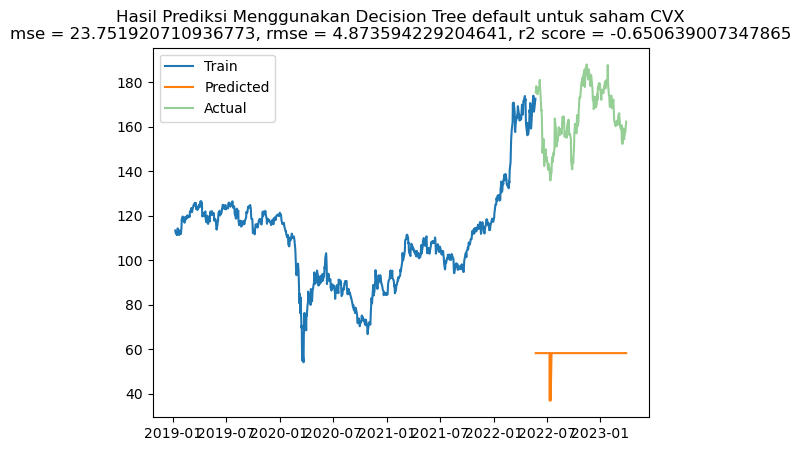

 
MSE  = 23.751920710936773
RMSE = 4.873594229204641
R2   = -0.650639007347865


In [ ]:
plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,tes_dtr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan Decision Tree default untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_Default_CVX.png'))
plt.show()

print(f'''
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

In [ ]:
MSE_list.append(mse)
RMSE_list.append(rmse)
MAE_list.append(mae)
R2_list.append(r2)

depth_list.append(1)
samp_leaf_list.append(1)
min_weight_list.append(0.1)

##### Optimasi Model dengan semi trial and error

In [ ]:
max_depth = np.arange(2,21,2)
min_sam_leaf = np.arange(1,10,1)
min_weight = np.linspace(0.0001,0.1,10)[::-1]

###### - Variasi Depth terbaik

In [ ]:
idx = 0
for i in max_depth:
    dtregressor = DecisionTreeRegressor(max_depth = i, min_samples_leaf= 1, min_weight_fraction_leaf = 0.1, random_state = 42)
    dtregressor.fit(X_train_cvx,y_train_cvx)
    tes_dtr = dtregressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,tes_dtr)
    rmse = mean_squared_error(y_test_cvx,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_cvx,tes_dtr)
    r2 = r2_score(y_test_cvx,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_depth = i

    idx += 1

    depth_list.append(i)
    samp_leaf_list.append(1)
    min_weight_list.append(0.1)

In [ ]:
df_score_tree_cvx = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1,236.976820,15.394051,12.639335,-0.453775
2,4,1,0.1,236.976820,15.394051,12.639335,-0.453775
3,6,1,0.1,236.976820,15.394051,12.639335,-0.453775
4,8,1,0.1,236.976820,15.394051,12.639335,-0.453775
5,10,1,0.1,236.976820,15.394051,12.639335,-0.453775
6,12,1,0.1,236.976820,15.394051,12.639335,-0.453775
7,14,1,0.1,236.976820,15.394051,12.639335,-0.453775
8,16,1,0.1,236.976820,15.394051,12.639335,-0.453775
9,18,1,0.1,236.976820,15.394051,12.639335,-0.453775


###### - Variasi min_sample_leaf terbaik

In [ ]:
for i in min_sam_leaf:
    dtregressor = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf= i, min_weight_fraction_leaf = 0.1, random_state = 42)
    dtregressor.fit(X_train_cvx,y_train_cvx)
    tes_dtr = dtregressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,tes_dtr)
    rmse = mean_squared_error(y_test_cvx,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_cvx,tes_dtr)
    r2 = r2_score(y_test_cvx,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_sam_leaf = i

    idx += 1

    depth_list.append(best_depth)
    samp_leaf_list.append(i)
    min_weight_list.append(0.1)

In [ ]:
df_score_tree_cvx = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1,236.976820,15.394051,12.639335,-0.453775
2,4,1,0.1,236.976820,15.394051,12.639335,-0.453775
3,6,1,0.1,236.976820,15.394051,12.639335,-0.453775
4,8,1,0.1,236.976820,15.394051,12.639335,-0.453775
5,10,1,0.1,236.976820,15.394051,12.639335,-0.453775
6,12,1,0.1,236.976820,15.394051,12.639335,-0.453775
7,14,1,0.1,236.976820,15.394051,12.639335,-0.453775
8,16,1,0.1,236.976820,15.394051,12.639335,-0.453775
9,18,1,0.1,236.976820,15.394051,12.639335,-0.453775


###### - Variasi min_weight terbaik

In [ ]:
for i in min_weight:
    dtregressor = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf= best_sam_leaf, min_weight_fraction_leaf = i, random_state = 42)
    dtregressor.fit(X_train_cvx,y_train_cvx)
    tes_dtr = dtregressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,tes_dtr)
    rmse = mean_squared_error(y_test_cvx,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_cvx,tes_dtr)
    r2 = r2_score(y_test_cvx,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_weight = i

    idx += 1

    depth_list.append(best_depth)
    samp_leaf_list.append(best_sam_leaf)
    min_weight_list.append(i)

In [ ]:
df_score_tree_cvx = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1000,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1000,236.976820,15.394051,12.639335,-0.453775
2,4,1,0.1000,236.976820,15.394051,12.639335,-0.453775
3,6,1,0.1000,236.976820,15.394051,12.639335,-0.453775
4,8,1,0.1000,236.976820,15.394051,12.639335,-0.453775
5,10,1,0.1000,236.976820,15.394051,12.639335,-0.453775
6,12,1,0.1000,236.976820,15.394051,12.639335,-0.453775
7,14,1,0.1000,236.976820,15.394051,12.639335,-0.453775
8,16,1,0.1000,236.976820,15.394051,12.639335,-0.453775
9,18,1,0.1000,236.976820,15.394051,12.639335,-0.453775


In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf= best_sam_leaf, min_weight_fraction_leaf = best_weight, random_state = 42)
dtregressor.fit(X_train_cvx,y_train_cvx)
tes_dtr = dtregressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_shel,tes_dtr)
rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
r2 = r2_score(y_test_shel,tes_dtr)

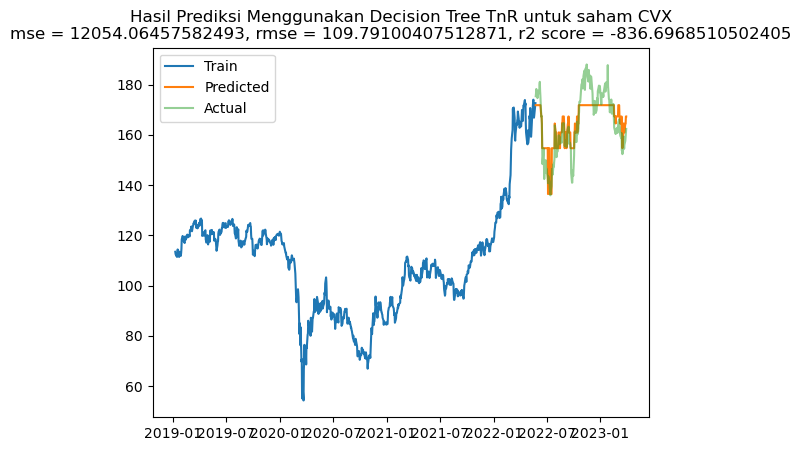

Max Depth terbaik = 20
Min Sample Leaf terbaik = 9
Min Weight Fraction Leaf terbaik = 0.0112


In [ ]:
plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,tes_dtr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan Decision Tree TnR untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_TnR_CVX.png'))
plt.show()

print(f'Max Depth terbaik = {best_depth}')
print(f'Min Sample Leaf terbaik = {best_sam_leaf}')
print(f'Min Weight Fraction Leaf terbaik = {best_weight}')

##### Optimasi Model dengan Grid Search

In [ ]:
max_depth = np.arange(2,21,2)
min_sam_leaf = np.arange(1,10,1)
min_weight = np.linspace(0.0001,0.1,10)[::-1]

In [ ]:
parameters={"max_depth" : max_depth,
           "min_samples_leaf": min_sam_leaf,
           'min_weight_fraction_leaf':min_weight}

In [ ]:
scoring = {'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2'}

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state = 42),
                          param_grid=parameters,
                          scoring=scoring,cv=5,verbose=1,refit='neg_mean_squared_error')

tuning_model.fit(X_train_cvx,y_train_cvx)
tune_params = tuning_model.best_params_

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


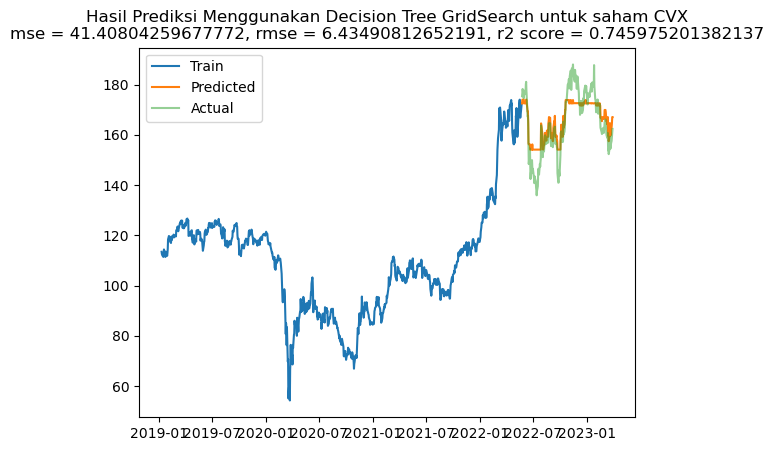

In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = tune_params['max_depth'] , min_samples_leaf= tune_params['min_samples_leaf'],
                                    min_weight_fraction_leaf = tune_params['min_weight_fraction_leaf'], random_state = 42)
dtregressor.fit(X_train_cvx,y_train_cvx)
tes_dtr = dtregressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,tes_dtr)
rmse = mean_squared_error(y_test_cvx,tes_dtr, squared=False)
mae = mean_absolute_error(y_test_cvx,tes_dtr)
r2 = r2_score(y_test_cvx,tes_dtr)

plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,tes_dtr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan Decision Tree GridSearch untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_GridSearch_CVX.png'))
plt.show()

In [ ]:
df_tree_cvx_tune = pd.DataFrame({'Depth':[tune_params['max_depth']],
                              'Min Sample Leaf': [tune_params['min_samples_leaf']],
                             'Min Weight Fraction': [tune_params['min_weight_fraction_leaf']],
                             'MSE':[mse],
                             'RMSE':[rmse],
                             'MAE':[mae],
                             'R2':[r2]})

df_tree_cvx_tune

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,12,1,0.0001,41.408043,6.434908,5.140469,0.745975


---

#### Saham Shell

##### Model dengan hyperparameter default

In [ ]:
depth_list = []
samp_leaf_list = []
min_weight_list = []
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

---

In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = 1,
                                    min_samples_leaf= 1,
                                    min_weight_fraction_leaf = 0.1,
                                    random_state = 42)
dtregressor.fit(X_train_shel,y_train_shel)
tes_dtr = dtregressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,tes_dtr)
mae = mean_absolute_error(y_test_shel,tes_dtr)
rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
r2 = r2_score(y_test_shel,tes_dtr)

Parameter awal/default untuk Decision Tree Regressor

    max_depth = 1,
    min_samples_leaf= 1,
    min_weight_fraction_leaf = 0.1,
    random_state = 42

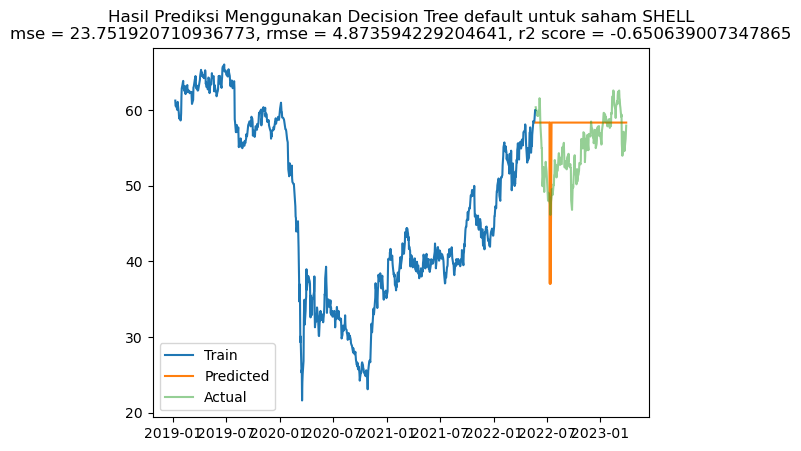

 
MSE  = 23.751920710936773
RMSE = 4.873594229204641
R2   = -0.650639007347865


In [ ]:
plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,tes_dtr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan Decision Tree default untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_Default_SHELL.png'))
plt.show()

print(f'''
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

In [ ]:
MSE_list.append(mse)
RMSE_list.append(rmse)
MAE_list.append(mae)
R2_list.append(r2)

depth_list.append(1)
samp_leaf_list.append(1)
min_weight_list.append(0.1)

In [ ]:
max_depth = np.arange(2,21,2)
min_sam_leaf = np.arange(1,10,1)
min_weight = np.linspace(0.0001,0.1,10)[::-1]

##### Optimasi Model dengan semi trial and error

###### - Variasi Depth terbaik

In [ ]:
idx = 0
for i in max_depth:
    dtregressor = DecisionTreeRegressor(max_depth = i, min_samples_leaf= 1, min_weight_fraction_leaf = 0.1, random_state = 42)
    dtregressor.fit(X_train_shel,y_train_shel)
    tes_dtr = dtregressor.predict(X_test_shel)

    mse = mean_squared_error(y_test_shel,tes_dtr)
    rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_shel,tes_dtr)
    r2 = r2_score(y_test_shel,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_depth = i

    idx += 1

    depth_list.append(i)
    samp_leaf_list.append(1)
    min_weight_list.append(0.1)

In [ ]:
df_score_tree_shel = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_shel

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1,7.587436,2.754530,2.300913,0.472711
2,4,1,0.1,2.424862,1.557197,1.235704,0.831484
3,6,1,0.1,2.424862,1.557197,1.235704,0.831484
4,8,1,0.1,2.424862,1.557197,1.235704,0.831484
5,10,1,0.1,2.424862,1.557197,1.235704,0.831484
6,12,1,0.1,2.424862,1.557197,1.235704,0.831484
7,14,1,0.1,2.424862,1.557197,1.235704,0.831484
8,16,1,0.1,2.424862,1.557197,1.235704,0.831484
9,18,1,0.1,2.424862,1.557197,1.235704,0.831484


###### - Variasi min_sample_leaf terbaik

In [ ]:
for i in min_sam_leaf:
    dtregressor = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf= i, min_weight_fraction_leaf = 0.1, random_state = 42)
    dtregressor.fit(X_train_shel,y_train_shel)
    tes_dtr = dtregressor.predict(X_test_shel)

    mse = mean_squared_error(y_test_shel,tes_dtr)
    rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_shel,tes_dtr)
    r2 = r2_score(y_test_shel,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_sam_leaf = i

    idx += 1

    depth_list.append(best_depth)
    samp_leaf_list.append(i)
    min_weight_list.append(0.1)

In [ ]:
df_score_tree_shel = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_shel

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1,7.587436,2.754530,2.300913,0.472711
2,4,1,0.1,2.424862,1.557197,1.235704,0.831484
3,6,1,0.1,2.424862,1.557197,1.235704,0.831484
4,8,1,0.1,2.424862,1.557197,1.235704,0.831484
5,10,1,0.1,2.424862,1.557197,1.235704,0.831484
6,12,1,0.1,2.424862,1.557197,1.235704,0.831484
7,14,1,0.1,2.424862,1.557197,1.235704,0.831484
8,16,1,0.1,2.424862,1.557197,1.235704,0.831484
9,18,1,0.1,2.424862,1.557197,1.235704,0.831484


###### - Variasi min_weight terbaik

In [ ]:
for i in min_weight:
    dtregressor = DecisionTreeRegressor(max_depth = best_depth, min_samples_leaf= best_sam_leaf, min_weight_fraction_leaf = i, random_state = 42)
    dtregressor.fit(X_train_shel,y_train_shel)
    tes_dtr = dtregressor.predict(X_test_shel)

    mse = mean_squared_error(y_test_shel,tes_dtr)
    rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
    mae = mean_absolute_error(y_test_shel,tes_dtr)
    r2 = r2_score(y_test_shel,tes_dtr)

    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)

    score = 0
    if mse <= MSE_list[idx]:
        score += 1
    if rmse <= RMSE_list[idx]:
        score += 1
    if mae <= MAE_list[idx]:
        score += 1
    if r2 >= R2_list[idx]:
        score += 1

    if score >= 3:
        best_weight = i

    idx += 1

    depth_list.append(best_depth)
    samp_leaf_list.append(best_sam_leaf)
    min_weight_list.append(i)

In [ ]:
df_score_tree_shel = pd.DataFrame({'Depth':depth_list,
                              'Min Sample Leaf': samp_leaf_list,
                             'Min Weight Fraction': min_weight_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_shel

,Depth,Min Sample Leaf,Min Weight Fraction,MSE,RMSE,MAE,R2
0,1,1,0.1000,23.751921,4.873594,3.960060,-0.650639
1,2,1,0.1000,7.587436,2.754530,2.300913,0.472711
2,4,1,0.1000,2.424862,1.557197,1.235704,0.831484
3,6,1,0.1000,2.424862,1.557197,1.235704,0.831484
4,8,1,0.1000,2.424862,1.557197,1.235704,0.831484
5,10,1,0.1000,2.424862,1.557197,1.235704,0.831484
6,12,1,0.1000,2.424862,1.557197,1.235704,0.831484
7,14,1,0.1000,2.424862,1.557197,1.235704,0.831484
8,16,1,0.1000,2.424862,1.557197,1.235704,0.831484
9,18,1,0.1000,2.424862,1.557197,1.235704,0.831484


In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = best_depth,
                                    min_samples_leaf= best_sam_leaf,
                                    min_weight_fraction_leaf = best_weight,
                                    random_state = 42)
dtregressor.fit(X_train_shel,y_train_shel)
tes_dtr = dtregressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,tes_dtr)
rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
r2 = r2_score(y_test_shel,tes_dtr)

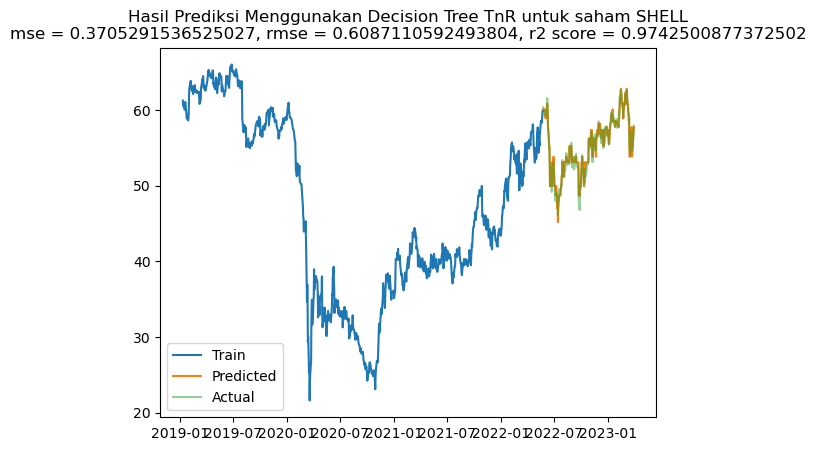

Max Depth terbaik = 20
Min Sample Leaf terbaik = 9
Min Weight Fraction Leaf terbaik = 0.0001


In [ ]:
plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,tes_dtr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan Decision Tree TnR untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_TnR_SHELL.png'))
plt.show()

print(f'Max Depth terbaik = {best_depth}')
print(f'Min Sample Leaf terbaik = {best_sam_leaf}')
print(f'Min Weight Fraction Leaf terbaik = {best_weight}')

##### Optimasi Model dengan Grid Search

In [ ]:
max_depth = np.arange(2,21,2)
min_sam_leaf = np.arange(1,10,1)
min_weight = np.linspace(0.0001,0.1,10)[::-1]

In [ ]:
parameters={"max_depth" : max_depth,
           "min_samples_leaf": min_sam_leaf,
           'min_weight_fraction_leaf':min_weight}

scoring = {'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2'}

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state = 42),
                          param_grid=parameters,
                          scoring=scoring,cv=5,verbose=1,refit='neg_mean_squared_error')

tuning_model.fit(X_train_shel,y_train_shel)
tune_params = tuning_model.best_params_

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


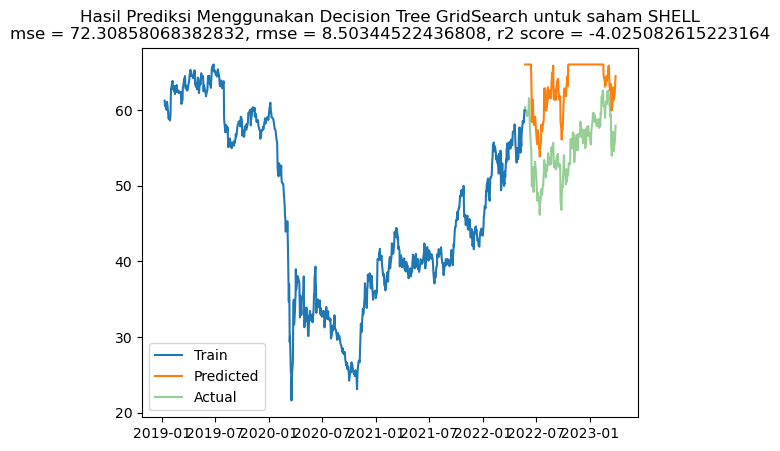

In [ ]:
dtregressor = DecisionTreeRegressor(max_depth = tune_params['max_depth'],
                                    min_samples_leaf= tune_params['min_samples_leaf'],
                                    min_weight_fraction_leaf = tune_params['min_weight_fraction_leaf'],
                                    random_state = 42)
dtregressor.fit(X_train_shel,y_train_shel)
tes_dtr = dtregressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_shel,tes_dtr)
rmse = mean_squared_error(y_test_shel,tes_dtr, squared=False)
mae = mean_absolute_error(y_test_shel,tes_dtr)
r2 = r2_score(y_test_shel,tes_dtr)

plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,tes_dtr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan Decision Tree GridSearch untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'DecisionTree_GridSearch_SHELL.png'))
plt.show()

---

### K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### Saham Chevron (CVX)

---

##### Model dengan hyperparameter default

Parameter default untuk model KNN Regressor :

    n_neighbors = 5
    weights     = 'uniform'
    algorithm   = 'auto'
    leaf_size   = 30
    p           = 2 (1 for l1 dsit and 2 for l2 dist)

In [ ]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
r2 = r2_score(y_test_cvx,test_knnr)

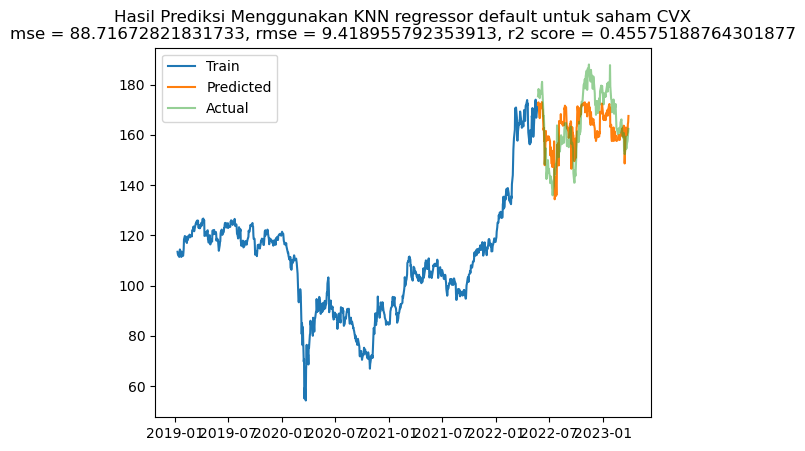

Dengan model KNN Regressor dengan 
parameter (default) didapatkan: 
MSE  = 88.71672821831733
RMSE = 9.418955792353913
R2   = 0.45575188764301877


In [ ]:
plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_Default_CVX.png'))
plt.show()

print(f'''Dengan model KNN Regressor dengan
parameter (default) didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

##### Optimasi Model dengan semi trial and error

Hasil percobaan mencari parameter terbaik menemukan bahwa parmeter terbaik adalah:

    n_neighbors = 18
    weights = 'distance'
    algorithm = auto
    leaf_size = default (30)
    p = 1

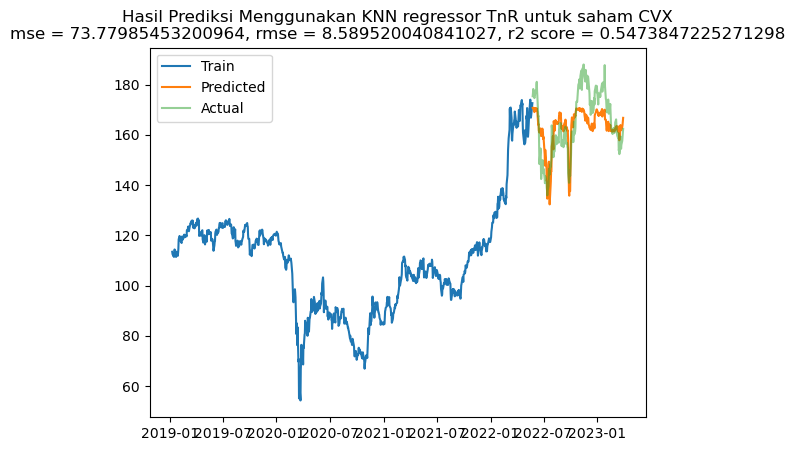

Dengan model KNN Regressor dengan metode TnR didapatkan: 
MSE  = 73.77985453200964
RMSE = 8.589520040841027
R2   = 0.5473847225271298


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=18,
                                       weights = 'distance',
                                       algorithm= 'auto',
                                       leaf_size = 30,
                                       p = 1)
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
r2 = r2_score(y_test_cvx,test_knnr)

plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan KNN regressor TnR untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_TnR_CVX.png'))
plt.show()

print(f'''Dengan model KNN Regressor dengan metode TnR didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

##### Model dengan hyperparameter GridSearch

In [ ]:
n_neighbors_opt = [i for i in range(1,56)]
weights_opt = ['uniform','distance']
algorithm_opt = ["auto","ball_tree","kd_tree","brute"]
p_opt = [1,2]

In [ ]:
parameters={"n_neighbors": n_neighbors_opt,
           "weights": weights_opt,
           "algorithm": algorithm_opt,
            "p":p_opt}

scoring = {'neg_mean_absolute_error',
           'neg_mean_squared_error',
           'neg_root_mean_squared_error',
           'r2'}

tuning_model=GridSearchCV(KNeighborsRegressor(),
                          param_grid=parameters,
                          scoring=scoring,cv=5,verbose=1,refit='neg_mean_squared_error')
tuning_model.fit(X_train_cvx,y_train_cvx)
tune_params = tuning_model.best_params_

Fitting 5 folds for each of 880 candidates, totalling 4400 fits


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors = tune_params['n_neighbors'],
                                       weights = tune_params['weights'],
                                       p = tune_params['p'])
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
r2 = r2_score(y_test_cvx,test_knnr)

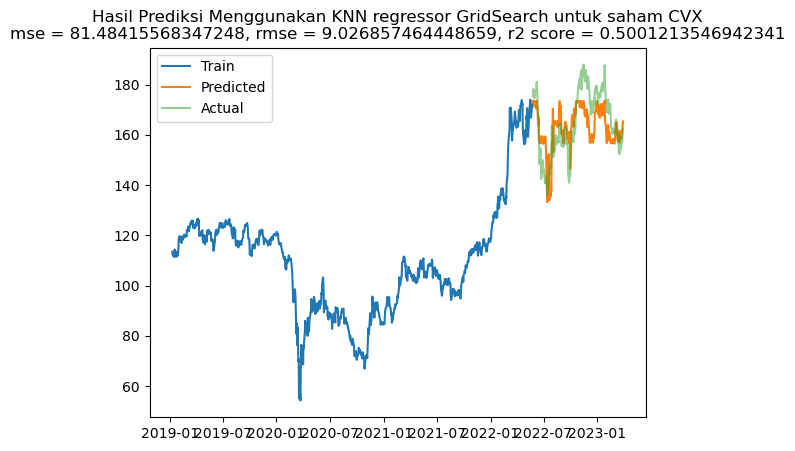

Dengan model KNN Regressor dengan parameter :
n_neighbors = 3
weights     = distance
algorithm   = 'auto'
leaf_size   = 30
p           = 1

didapatkan: 
MSE  = 81.48415568347248
RMSE = 9.026857464448659
R2   = 0.5001213546942341


In [ ]:
plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan KNN regressor GridSearch untuk saham CVX' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_GridSearch_CVX.png'))
plt.show()

print(f'''Dengan model KNN Regressor dengan parameter :
n_neighbors = {tune_params['n_neighbors']}
weights     = {tune_params['weights']}
algorithm   = 'auto'
leaf_size   = 30
p           = {tune_params['p']}

didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

---

#### Saham Shell

---

##### Model dengan hyperparameter default

Parameter default untuk model KNN Regressor :

    n_neighbors = 5
    weights     = 'uniform'
    algorithm   = 'auto'
    leaf_size   = 30
    p           = 2 (1 for l1 dsit and 2 for l2 dist)

In [ ]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

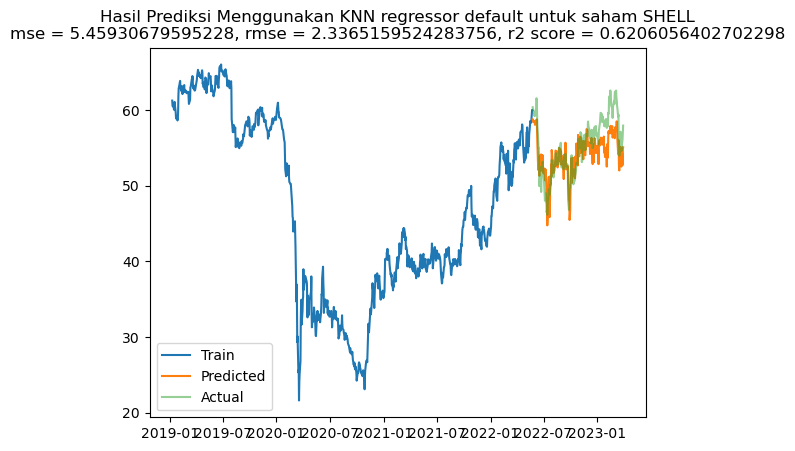

Dengan model KNN Regressor dengan parameter (default):
n_neighbors = 5
weights     = 'uniform'
algorithm   = 'auto'
leaf_size   = 30
p           = 2 (1 for l1 dsit and 2 for l2 dist)

didapatkan: 
MSE  = 5.45930679595228
RMSE = 2.3365159524283756
R2   = 0.6206056402702298


In [ ]:
plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_Default_SHELL.png'))
plt.show()

print(f'''Dengan model KNN Regressor dengan parameter (default):
n_neighbors = 5
weights     = 'uniform'
algorithm   = 'auto'
leaf_size   = 30
p           = 2 (1 for l1 dsit and 2 for l2 dist)

didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

##### Optimasi Model dengan semi trial and error

Hasil percobaan mencari parameter terbaik pada saham CVX (percobaan dilakukan sekali saja karena terlalu banyak) ditemukan bahwa parmeter terbaik adalah:

    n_neighbors = 18
    weights = 'distance'
    algorithm = auto
    leaf_size = default (30)
    p = 1

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=18,
                                       weights = 'distance',
                                       algorithm= 'auto',
                                       leaf_size = 30,
                                       p = 1)
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

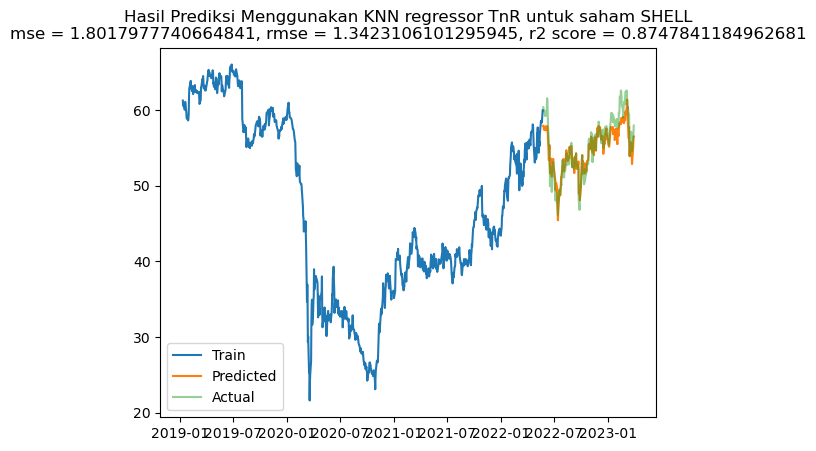

Dengan model KNN Regressor
dengan parameter (TnR) didapatkan: 
MSE  = 1.8017977740664841
RMSE = 1.3423106101295945
R2   = 0.8747841184962681


In [ ]:
plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title(f'Hasil Prediksi Menggunakan KNN regressor TnR untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_TnR_SHELL.png'))
plt.show()

print(f'''Dengan model KNN Regressor
dengan parameter (TnR) didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

##### Optimasi Model dengan Grid Search

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors = tune_params['n_neighbors'],
                                       weights = tune_params['weights'],
                                       p = tune_params['p'])
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

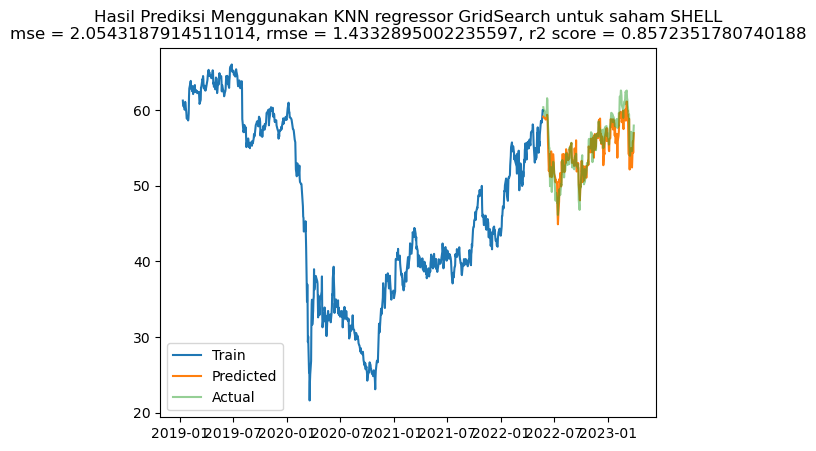

Dengan model KNN Regressor
dengan parameter (GridSearch):
n_neighbors = 3
weights     = distance
algorithm   = 'auto'
leaf_size   = 30
p           = 1

didapatkan: 
MSE  = 2.0543187914511014
RMSE = 1.4332895002235597
R2   = 0.8572351780740188


In [ ]:
plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor GridSearch untuk saham SHELL' +
          '\nmse = ' + str(mse) + ', rmse = ' + str(rmse) + ', r2 score = ' + str(r2))
plt.legend()
plt.savefig(os.path.join(output_dir, 'KNN_GridSearch_SHELL.png'))
plt.show()

print(f'''Dengan model KNN Regressor
dengan parameter (GridSearch):
n_neighbors = {tune_params['n_neighbors']}
weights     = {tune_params['weights']}
algorithm   = 'auto'
leaf_size   = 30
p           = {tune_params['p']}

didapatkan:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

---

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#### Saham CVX

---

##### Model dengan hyperparameter default

In [ ]:
def ridge_regresi(X_train, y_train, X_test, y_test, saham):
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_Default_{saham}.png'))
    plt.show()

Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 1.9765292623759148
    RMSE = 1.4058909141095957
    R2   = 0.9878746394093879


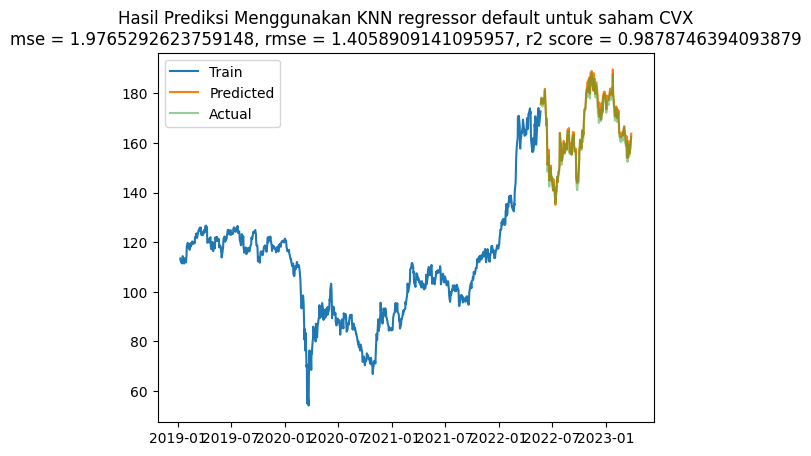

In [ ]:
ridge_regresi(X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, 'CVX')

##### Optimasi Model dengan semi trial and error

In [ ]:
def model_ridge( alpha, solver, X_train, y_train, X_test, y_test, saham):
    model= Ridge(alpha= alpha, solver=solver)  # alpha adalah parameter regulasi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_GridSearch_{saham}.png'))
    plt.show()

Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 1.756519191356874
    RMSE = 1.325337387745805
    R2   = 0.9892243292396641


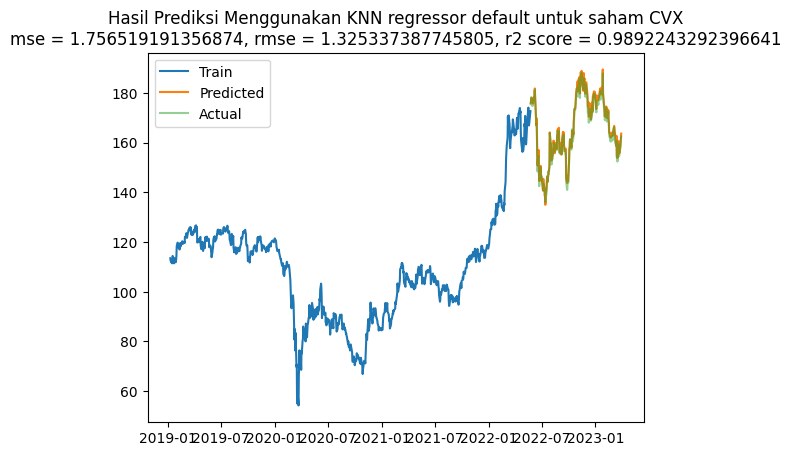

In [ ]:
model_ridge(0.5,'auto', X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, 'CVX')

Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 1.3686224617054752
    RMSE = 1.169881387878906
    R2   = 0.9916039488124543


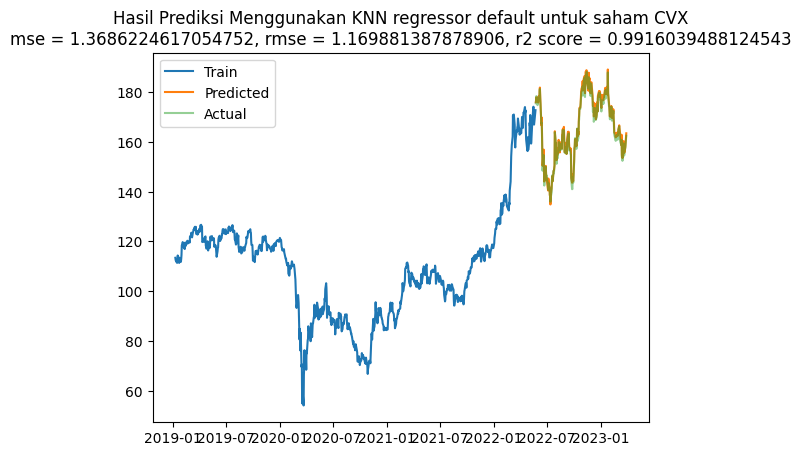

In [ ]:
model_ridge(0.1,'auto', X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, 'CVX')

Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 1.2031554580752672
    RMSE = 1.096884432415406
    R2   = 0.9926190347628908


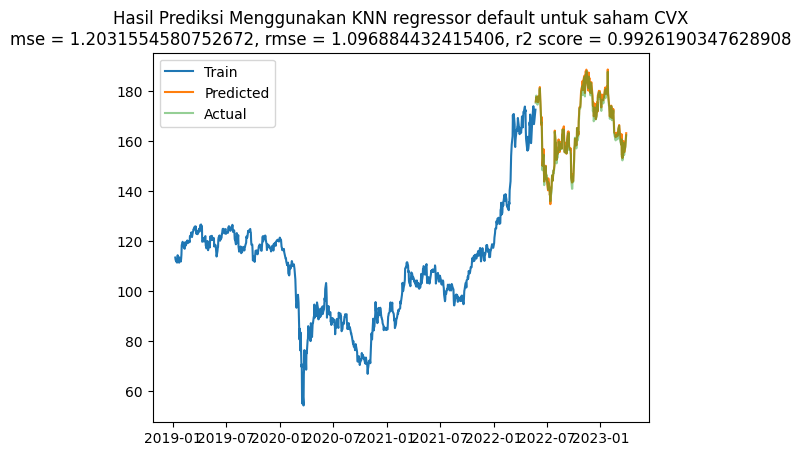

In [ ]:
model_ridge(0.01,'auto', X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, 'CVX')

##### Optimasi Model dengan Grid Search

In [ ]:
def tuning_parameter_ridge(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.01, 0.1, 1.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    results['mse'] = -results['mean_test_score']
    columns = ['param_alpha', 'param_solver', 'mse']
    return(results[columns])

In [ ]:
def model_ridge( alpha, solver, X_train, y_train, X_test, y_test, saham):
    model= Ridge(alpha= alpha, solver=solver)  # alpha adalah parameter regulasi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_GridSearch_{saham}.png'))
    plt.show()

In [ ]:
tuning_parameter_ridge(X_train_cvx, y_train_cvx)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

,param_alpha,param_solver,mse
0,0.01,auto,0.478973
1,0.01,svd,0.478973
2,0.01,cholesky,0.478973
3,0.01,lsqr,0.479888
4,0.01,sparse_cg,0.497819
5,0.01,sag,0.478866
6,0.01,saga,0.487029
7,0.1,auto,0.498265
8,0.1,svd,0.498265
9,0.1,cholesky,0.498265


Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 1.2031554580752672
    RMSE = 1.096884432415406
    R2   = 0.9926190347628908


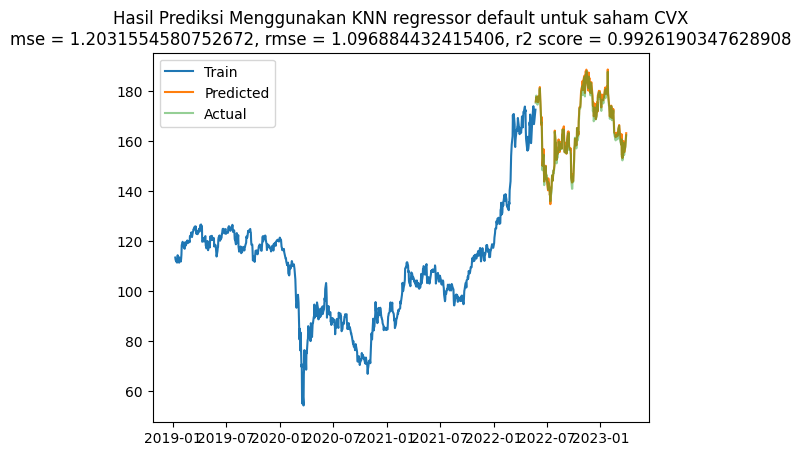

In [ ]:
model_ridge(0.01,'auto', X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, 'CVX')

---

#### Saham Shell (Shell)

---

##### Model dengan hyperparameter default

In [ ]:
def ridge_regresi(X_train, y_train, X_test, y_test, saham):
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_Default_{saham}.png'))
    plt.show()

Dengan model Ridge Regression pada saham Shel
    didapatkan: 
    MSE  = 0.2654542837114495
    RMSE = 0.5152225574559498
    R2   = 0.9815522626277569


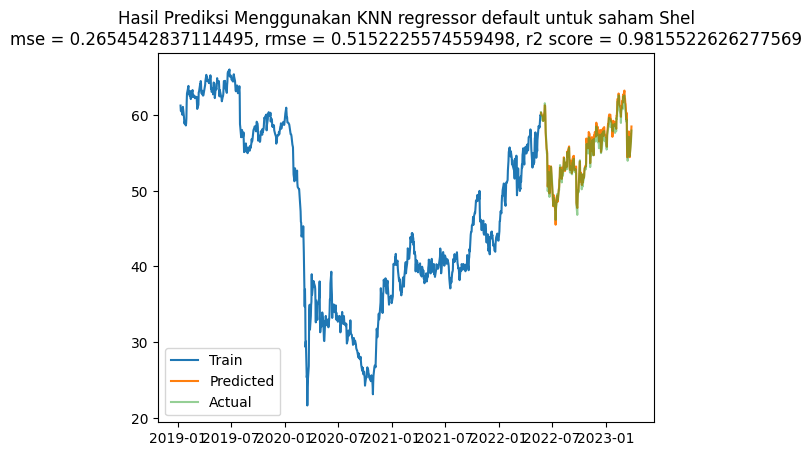

In [ ]:
ridge_regresi(X_train_shel, y_train_shel, X_test_shel, y_test_shel, 'Shel')

##### Optimasi Model dengan semi trial and error

In [ ]:
def model_ridge( alpha, solver, X_train, y_train, X_test, y_test, saham):
    model= Ridge(alpha= alpha, solver=solver)  # alpha adalah parameter regulasi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_GridSearch_{saham}.png'))
    plt.show()

Dengan model Ridge Regression pada saham Shel
    didapatkan:
    MSE  = 0.22637876402927
    RMSE = 0.47579277425079713
    R2   = 0.9842678146795155


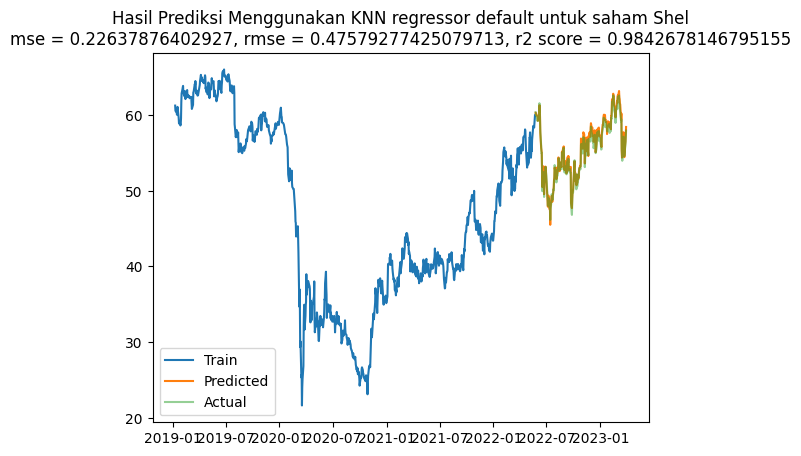

In [ ]:
model_ridge(0.5,'auto', X_train_shel, y_train_shel, X_test_shel, y_test_shel, 'Shel')

Dengan model Ridge Regression pada saham Shel
    didapatkan:
    MSE  = 0.16771834144514144
    RMSE = 0.409534298252468
    R2   = 0.9883444189627341


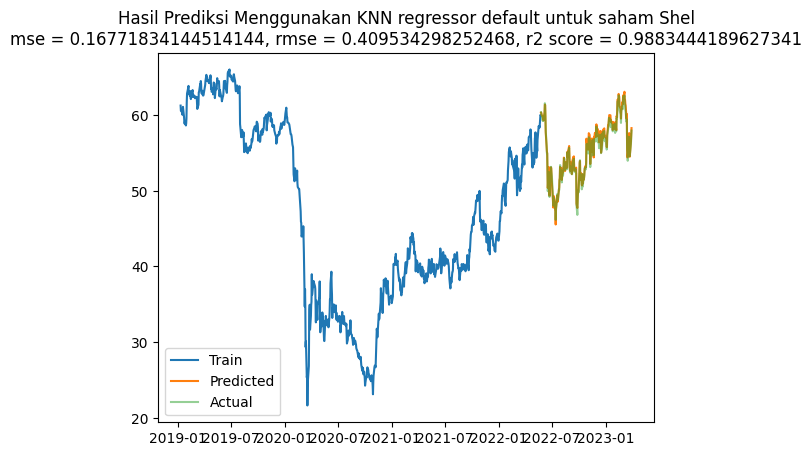

In [ ]:
model_ridge(0.1,'auto', X_train_shel, y_train_shel, X_test_shel, y_test_shel, 'Shel')

Dengan model Ridge Regression pada saham Shel
    didapatkan:
    MSE  = 0.1513825953900676
    RMSE = 0.3890791633974603
    R2   = 0.9894796711379494


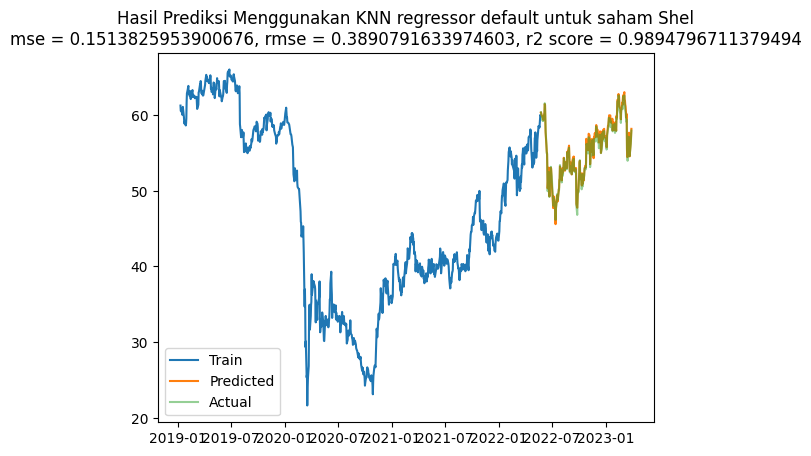

In [ ]:
model_ridge(0.01,'auto',X_train_shel, y_train_shel, X_test_shel, y_test_shel, 'Shel')

##### Optimasi Model dengan Grid Search

In [ ]:
def tuning_parameter_ridge(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.01, 0.1, 1.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    results['mse'] = -results['mean_test_score']
    columns = ['param_alpha', 'param_solver', 'mse']
    return(results[columns])

In [ ]:
def model_ridge( alpha, solver, X_train, y_train, X_test, y_test, saham):
    model= Ridge(alpha= alpha, solver=solver)  # alpha adalah parameter regulasi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model Ridge Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan KNN regressor default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'RidgeRegression_GridSearch_{saham}.png'))
    plt.show()

In [ ]:
tuning_parameter_ridge(X_train_shel, y_train_shel)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

,param_alpha,param_solver,mse
0,0.01,auto,0.074492
1,0.01,svd,0.074492
2,0.01,cholesky,0.074492
3,0.01,lsqr,0.074458
4,0.01,sparse_cg,0.120927
5,0.01,sag,0.077198
6,0.01,saga,0.084250
7,0.1,auto,0.090891
8,0.1,svd,0.090891
9,0.1,cholesky,0.090891


Dengan model Ridge Regression pada saham Shel
    didapatkan: 
    MSE  = 0.1513825953900676
    RMSE = 0.3890791633974603
    R2   = 0.9894796711379494


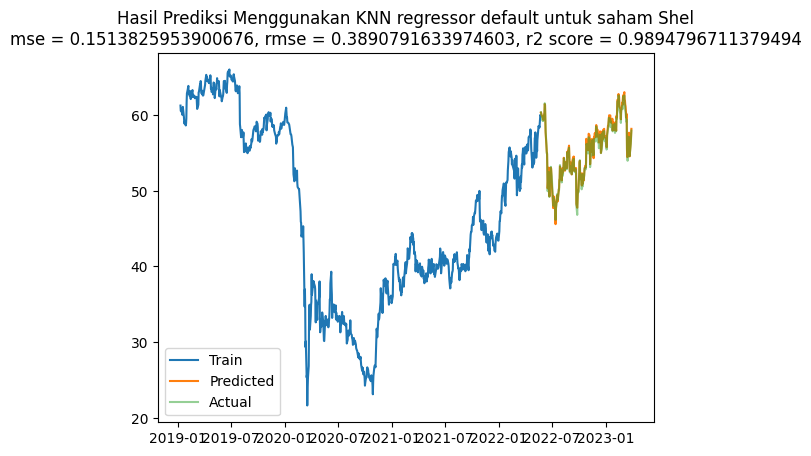

In [ ]:
model_ridge(0.01,'auto', X_train_shel, y_train_shel, X_test_shel, y_test_shel,"Shel")

---

In [ ]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor

### Long Short Term Memory (LSTM) Neural Network (regression)

#### Saham CVX

---

##### Model dengan hyperparameter default

7/7 [==============================] - 1s 5ms/step
Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 268.9602884941476
    RMSE = 16.40000879555092
    R2   = -0.6499834050654907


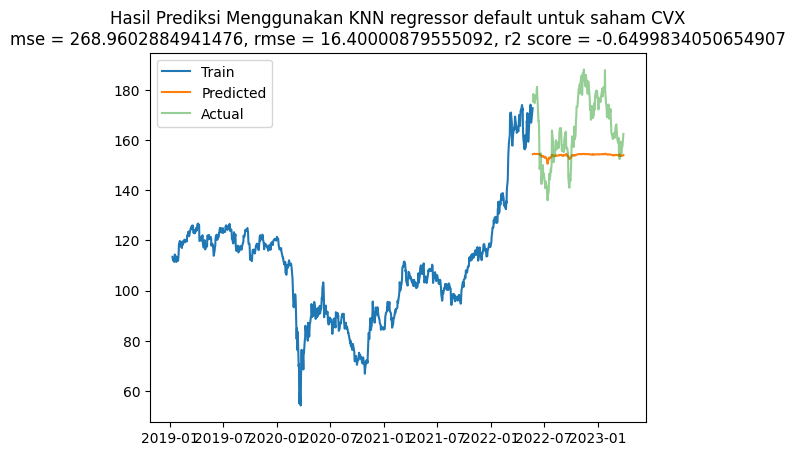

In [ ]:
model_lstm(1, X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, "CVX")

##### Optimasi Model dengan semi trial and error

Epoch 1/5
850/850 [==============================] - 11s 10ms/step - loss: 1113.7399
Epoch 2/5
850/850 [==============================] - 7s 9ms/step - loss: 30.1163
Epoch 3/5
850/850 [==============================] - 8s 10ms/step - loss: 14.3138
Epoch 4/5
850/850 [==============================] - 8s 10ms/step - loss: 9.1386
Epoch 5/5
7/7 [==============================] - 1s 6ms/step
Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 140.66147800523925
    RMSE = 11.860079173649696
    R2   = 0.13708783649791723


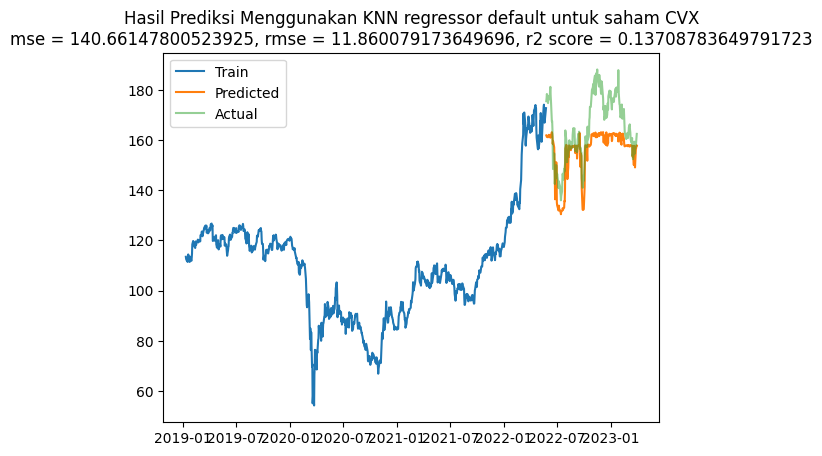

In [ ]:
model_lstm(5, X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, "CVX")

Epoch 1/10
850/850 [==============================] - 11s 8ms/step - loss: 1245.4152
Epoch 2/10
850/850 [==============================] - 9s 10ms/step - loss: 48.4422
Epoch 3/10
850/850 [==============================] - 8s 10ms/step - loss: 23.3226
Epoch 4/10
850/850 [==============================] - 8s 9ms/step - loss: 12.9488
Epoch 5/10
850/850 [==============================] - 9s 10ms/step - loss: 12.0904
Epoch 6/10
850/850 [==============================] - 7s 9ms/step - loss: 9.6601
Epoch 7/10
850/850 [==============================] - 9s 10ms/step - loss: 8.8949
Epoch 8/10
850/850 [==============================] - 9s 10ms/step - loss: 7.9362
Epoch 9/10
850/850 [==============================] - 8s 9ms/step - loss: 6.9371
Epoch 10/10
7/7 [==============================] - 1s 6ms/step
Dengan model Ridge Regression pada saham CVX
    didapatkan: 
    MSE  = 77.14854578427564
    RMSE = 8.78342449072545
    R2   = 0.5267189034422832


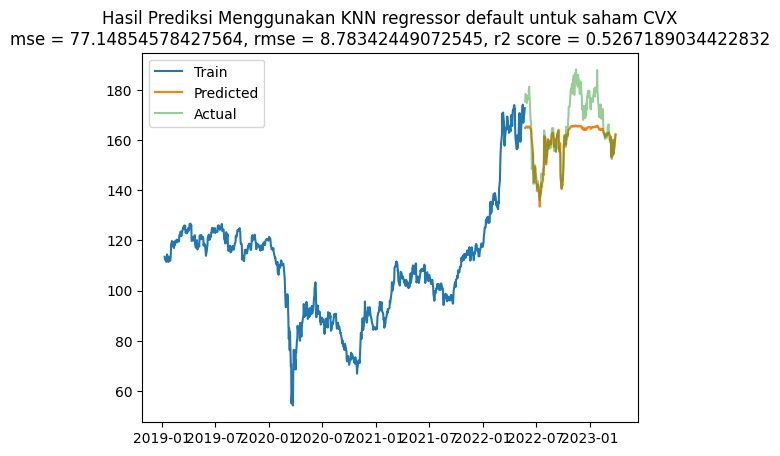

In [ ]:
model_lstm(10, X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, "CVX")

Epoch 1/15
850/850 [==============================] - 13s 11ms/step - loss: 1049.1482
Epoch 2/15
850/850 [==============================] - 9s 10ms/step - loss: 20.1588
Epoch 3/15
850/850 [==============================] - 8s 9ms/step - loss: 13.4396
Epoch 4/15
850/850 [==============================] - 9s 11ms/step - loss: 11.8678
Epoch 5/15
850/850 [==============================] - 9s 10ms/step - loss: 23.5007
Epoch 6/15
850/850 [==============================] - 8s 10ms/step - loss: 7.6788
Epoch 7/15
850/850 [==============================] - 9s 10ms/step - loss: 274.6002
Epoch 8/15
850/850 [==============================] - 9s 11ms/step - loss: 25.5970
Epoch 9/15
850/850 [==============================] - 8s 9ms/step - loss: 12.0690
Epoch 10/15
850/850 [==============================] - 9s 10ms/step - loss: 8.2698
Epoch 11/15
850/850 [==============================] - 9s 10ms/step - loss: 5.9029
Epoch 12/15
850/850 [==============================] - 8s 10ms/step - loss: 5.7353
Epo

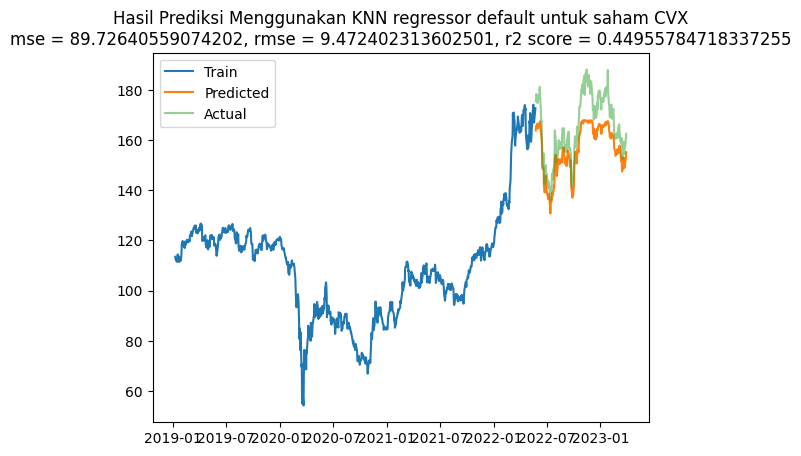

In [ ]:
model_lstm(15, X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, "CVX")

Epoch 1/20
850/850 [==============================] - 15s 11ms/step - loss: 1088.4652
Epoch 2/20
850/850 [==============================] - 8s 9ms/step - loss: 37.0095
Epoch 3/20
850/850 [==============================] - 9s 11ms/step - loss: 13.8282
Epoch 4/20
850/850 [==============================] - 9s 11ms/step - loss: 10.0047
Epoch 5/20
850/850 [==============================] - 8s 10ms/step - loss: 18.3285
Epoch 6/20
850/850 [==============================] - 9s 11ms/step - loss: 8.7289
Epoch 7/20
850/850 [==============================] - 11s 12ms/step - loss: 8.4508
Epoch 8/20
850/850 [==============================] - 8s 10ms/step - loss: 6.7476
Epoch 9/20
850/850 [==============================] - 10s 11ms/step - loss: 7.6231
Epoch 10/20
850/850 [==============================] - 9s 11ms/step - loss: 8.4107
Epoch 11/20
850/850 [==============================] - 8s 10ms/step - loss: 9.1012
Epoch 12/20
850/850 [==============================] - 10s 11ms/step - loss: 19.6988
Ep

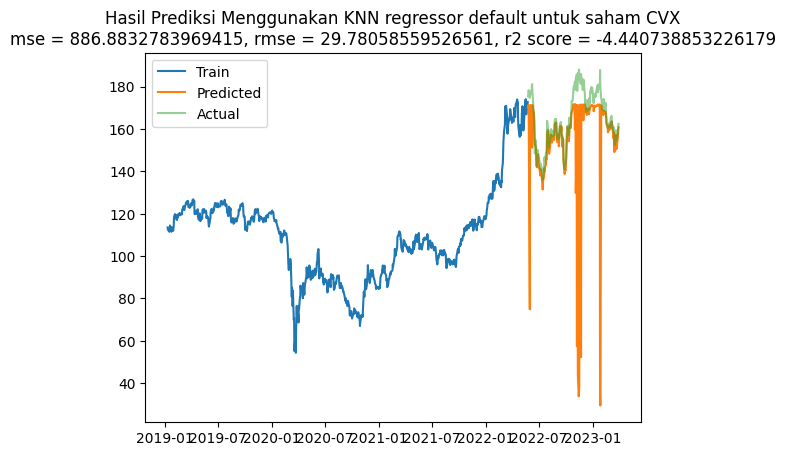

In [ ]:
model_lstm(20, X_train_cvx, y_train_cvx, X_test_cvx, y_test_cvx, "CVX")

##### Optimasi Model dengan Grid Search

In [ ]:
def model_lstm(units=25,epoch=10,d_unit=15,num_layers =1):
    # membangun model LSTM
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(14, 1)))
    for _ in range(num_layers):
        model.add(LSTM(units=units, return_sequences=False))
        model.add(Dense(units=d_unit))

    model.add(Dense(units=1))

    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.fit(X_train_shel, y_train_shel, epochs=epochs, verbose=0)

    return model_lstm


In [ ]:
# Create the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [25, 50,75,100],
    'epoch' : [10,15,20,25,30],
    'd_unit' : [15,25,35]
    'num_layers' : [1,2,3,4]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Perform grid search
grid = GridSearchCV(estimator=model_lstm,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=5,
                    refit='neg_mean_squared_error')

grid_result = grid.fit(X_train_shel, y_train_shel)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

In [ ]:
# Train the model with best parameters
best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train_shel, y_train_shel, epochs=10, batch_size=32, verbose=0)

# Make predictions
test_lstm = best_model.predict(X_test_shel)

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_shel, test_lstm)
rmse = mean_squared_error(y_test_shel, test_lstm, squared=False)
r2 = r2_score(y_test_shel, test_lstm)

# Visualize the results
plt.plot(X_train_shel.index, y_train_shel, label='Train')
plt.plot(X_test_shel.index, test_lstm, label='Predicted')
plt.plot(X_test_shel.index, y_test_shel, alpha=0.5, label='Actual')
plt.title(f'Hasil Prediksi Menggunakan LSTM GridSearch untuk saham SHELL\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')
plt.legend()
plt.savefig(os.path.join(output_dir, f'LSTM_GridSearch_SHELL.png'))
plt.show()

print(f'''Dengan model
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

---

#### Saham Shell

---

In [ ]:
def model_lstm(epochs, X_train, y_train, X_test, y_test, saham):
    # membangun model LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_cvx.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=1, epochs=epochs)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'''Dengan model LSTM Regression pada saham {saham}
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')

    plt.plot(X_train.index,y_train,label='Train')
    plt.plot(X_test.index,y_pred,label='Predicted')
    plt.plot(X_test.index,y_test, alpha=0.5,label='Actual')
    plt.title(f'Hasil Prediksi Menggunakan LSTM Regression default untuk saham {saham}\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')


    plt.legend()
    plt.savefig(os.path.join(output_dir, f'LSTM_TnR_{saham}.png'))
    plt.show()

---

##### Model dengan hyperparameter default

7/7 [==============================] - 1s 6ms/step
Dengan model LSTM Regression pada saham Shell
    didapatkan: 
    MSE  = 5.963883077232711
    RMSE = 2.442106278856985
    R2   = 0.5855401269502689


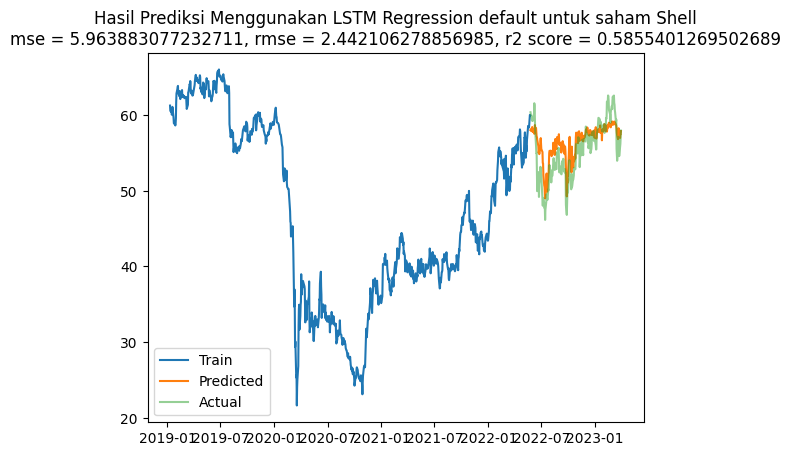

In [ ]:
model_lstm(1, X_train_shel, y_train_shel, X_test_shel, y_test_shel, "Shell")

##### Optimasi Model dengan semi trial and error

Epoch 1/5
850/850 [==============================] - 12s 11ms/step - loss: 129.1429
Epoch 2/5
850/850 [==============================] - 9s 11ms/step - loss: 12.0679
Epoch 3/5
850/850 [==============================] - 8s 10ms/step - loss: 4.2974
Epoch 4/5
850/850 [==============================] - 9s 11ms/step - loss: 3.9226
Epoch 5/5
7/7 [==============================] - 1s 6ms/step
Dengan model LSTM Regression pada saham Shell
    didapatkan: 
    MSE  = 1.1777886715218202
    RMSE = 1.0852597253753684
    R2   = 0.9181496120972162


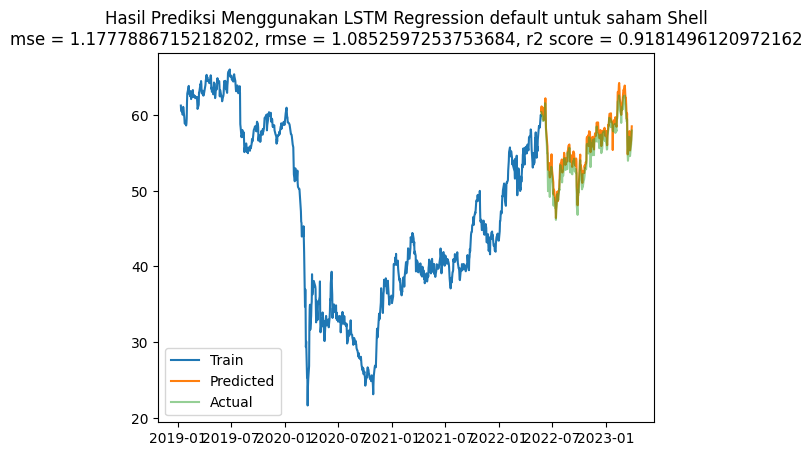

In [ ]:
model_lstm(5, X_train_shel, y_train_shel, X_test_shel, y_test_shel, "Shell")

Epoch 1/10
850/850 [==============================] - 14s 11ms/step - loss: 108.9010
Epoch 2/10
850/850 [==============================] - 11s 13ms/step - loss: 5.8149
Epoch 3/10
850/850 [==============================] - 9s 10ms/step - loss: 2.7406
Epoch 4/10
850/850 [==============================] - 10s 11ms/step - loss: 2.0893
Epoch 5/10
850/850 [==============================] - 9s 11ms/step - loss: 1.6930
Epoch 6/10
850/850 [==============================] - 8s 10ms/step - loss: 1.5382
Epoch 7/10
850/850 [==============================] - 10s 11ms/step - loss: 1.2879
Epoch 8/10
850/850 [==============================] - 9s 11ms/step - loss: 1.1273
Epoch 9/10
850/850 [==============================] - 9s 10ms/step - loss: 1.0146
Epoch 10/10
7/7 [==============================] - 1s 7ms/step
Dengan model LSTM Regression pada saham Shell
    didapatkan: 
    MSE  = 0.7330305496353149
    RMSE = 0.856172032733676
    R2   = 0.9490580642495764


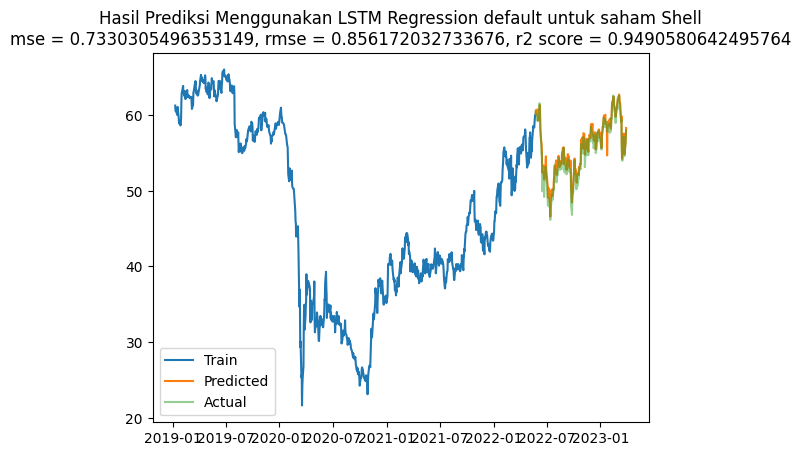

In [ ]:
model_lstm(10, X_train_shel, y_train_shel, X_test_shel, y_test_shel, "Shell")

Epoch 1/15
850/850 [==============================] - 24s 19ms/step - loss: 131.2621
Epoch 2/15
850/850 [==============================] - 15s 18ms/step - loss: 9.8856
Epoch 3/15
850/850 [==============================] - 9s 11ms/step - loss: 5.0723
Epoch 4/15
850/850 [==============================] - 9s 10ms/step - loss: 2.5381
Epoch 5/15
850/850 [==============================] - 9s 10ms/step - loss: 2.0625
Epoch 6/15
850/850 [==============================] - 9s 11ms/step - loss: 1.6760
Epoch 7/15
850/850 [==============================] - 9s 10ms/step - loss: 1.4618
Epoch 8/15
850/850 [==============================] - 8s 9ms/step - loss: 1.3106
Epoch 9/15
850/850 [==============================] - 9s 11ms/step - loss: 1.1067
Epoch 10/15
850/850 [==============================] - 9s 10ms/step - loss: 0.9761
Epoch 11/15
850/850 [==============================] - 8s 10ms/step - loss: 0.8857
Epoch 12/15
850/850 [==============================] - 10s 12ms/step - loss: 0.8442
Epoch 13/

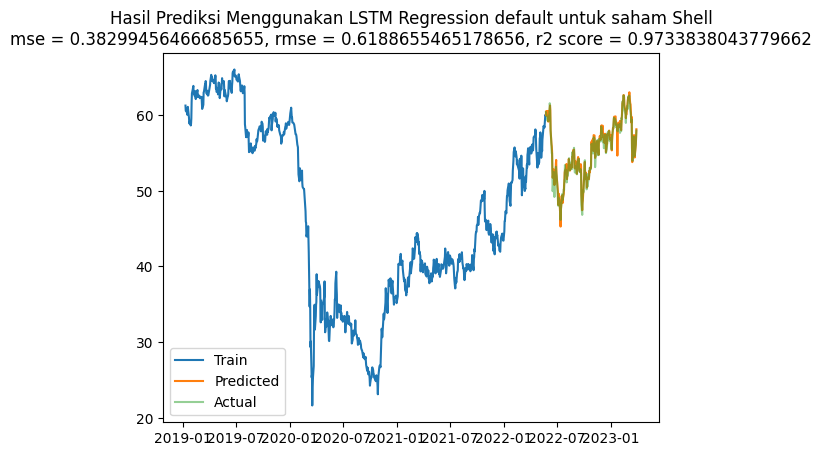

In [ ]:
model_lstm(15,X_train_shel, y_train_shel, X_test_shel, y_test_shel, "Shell")

Epoch 1/20
850/850 [==============================] - 13s 11ms/step - loss: 112.4861
Epoch 2/20
850/850 [==============================] - 8s 10ms/step - loss: 9.6829
Epoch 3/20
850/850 [==============================] - 9s 11ms/step - loss: 4.0626
Epoch 4/20
850/850 [==============================] - 9s 11ms/step - loss: 2.9057
Epoch 5/20
850/850 [==============================] - 9s 10ms/step - loss: 2.3510
Epoch 6/20
850/850 [==============================] - 9s 10ms/step - loss: 1.6987
Epoch 7/20
850/850 [==============================] - 9s 11ms/step - loss: 1.4998
Epoch 8/20
850/850 [==============================] - 9s 11ms/step - loss: 1.4062
Epoch 9/20
850/850 [==============================] - 9s 10ms/step - loss: 1.2270
Epoch 10/20
850/850 [==============================] - 9s 11ms/step - loss: 1.0901
Epoch 11/20
850/850 [==============================] - 9s 11ms/step - loss: 0.9555
Epoch 12/20
850/850 [==============================] - 8s 10ms/step - loss: 0.9791
Epoch 13/2

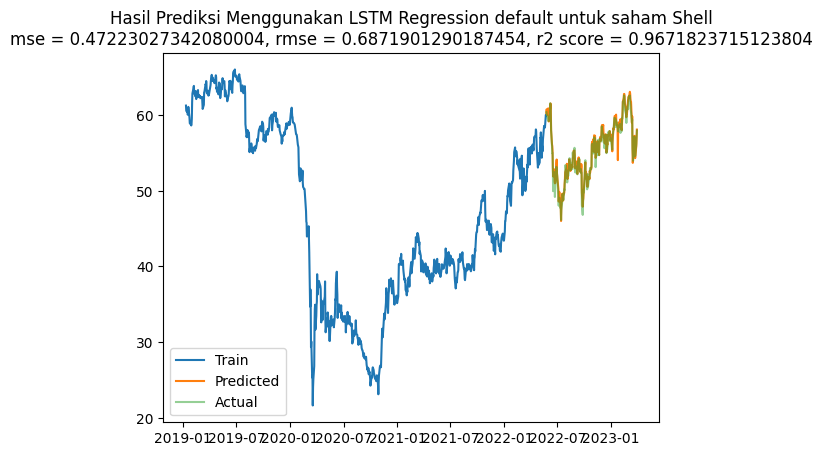

In [ ]:
model_lstm(20, X_train_shel, y_train_shel, X_test_shel, y_test_shel, "Shell")

##### Optimasi Model dengan Grid Search

---

In [ ]:
def model_lstm(units=25,epoch=10,d_unit=15,num_layers =1):
    # membangun model LSTM
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(14, 1)))
    for _ in range(num_layers):
        model.add(LSTM(units=units, return_sequences=False))
        model.add(Dense(units=d_unit))

    model.add(Dense(units=1))

    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.fit(X_train_shel, y_train_shel, epochs=epochs, verbose=0)

    return model_lstm


In [ ]:
# Create the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [25, 50,75,100],
    'epoch' : [10,15,20,25,30],
    'd_unit' : [15,25,35]
    'num_layers' : [1,2,3,4]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Perform grid search
grid = GridSearchCV(estimator=model_lstm,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=5,
                    refit='neg_mean_squared_error')

grid_result = grid.fit(X_train_shel, y_train_shel)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

In [ ]:
# Train the model with best parameters
best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train_shel, y_train_shel, epochs=10, batch_size=32, verbose=0)

# Make predictions
test_lstm = best_model.predict(X_test_shel)

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_shel, test_lstm)
rmse = mean_squared_error(y_test_shel, test_lstm, squared=False)
r2 = r2_score(y_test_shel, test_lstm)

# Visualize the results
plt.plot(X_train_shel.index, y_train_shel, label='Train')
plt.plot(X_test_shel.index, test_lstm, label='Predicted')
plt.plot(X_test_shel.index, y_test_shel, alpha=0.5, label='Actual')
plt.title(f'Hasil Prediksi Menggunakan LSTM GridSearch untuk saham SHELL\n'
          f'mse = {mse}, rmse = {rmse}, r2 score = {r2}')
plt.legend()
plt.savefig(os.path.join(output_dir, f'LSTM_GridSearch_SHELL.png'))
plt.show()

print(f'''Dengan model
    didapatkan:
    MSE  = {mse}
    RMSE = {rmse}
    R2   = {r2}''')